In [597]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')


Import the dataset

In [598]:
df= pd.read_csv("abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [599]:
df.shape

(4177, 9)

The dataset has 4177 rows and 9 columns

In [600]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

We have sex as nominal variable, the remaining variable are continuos variables.
The target variable is the number of rings we have to predict.

In [601]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

We can see that there are no missing values in the dataset

In [602]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<b>Univariate Analysis<b>

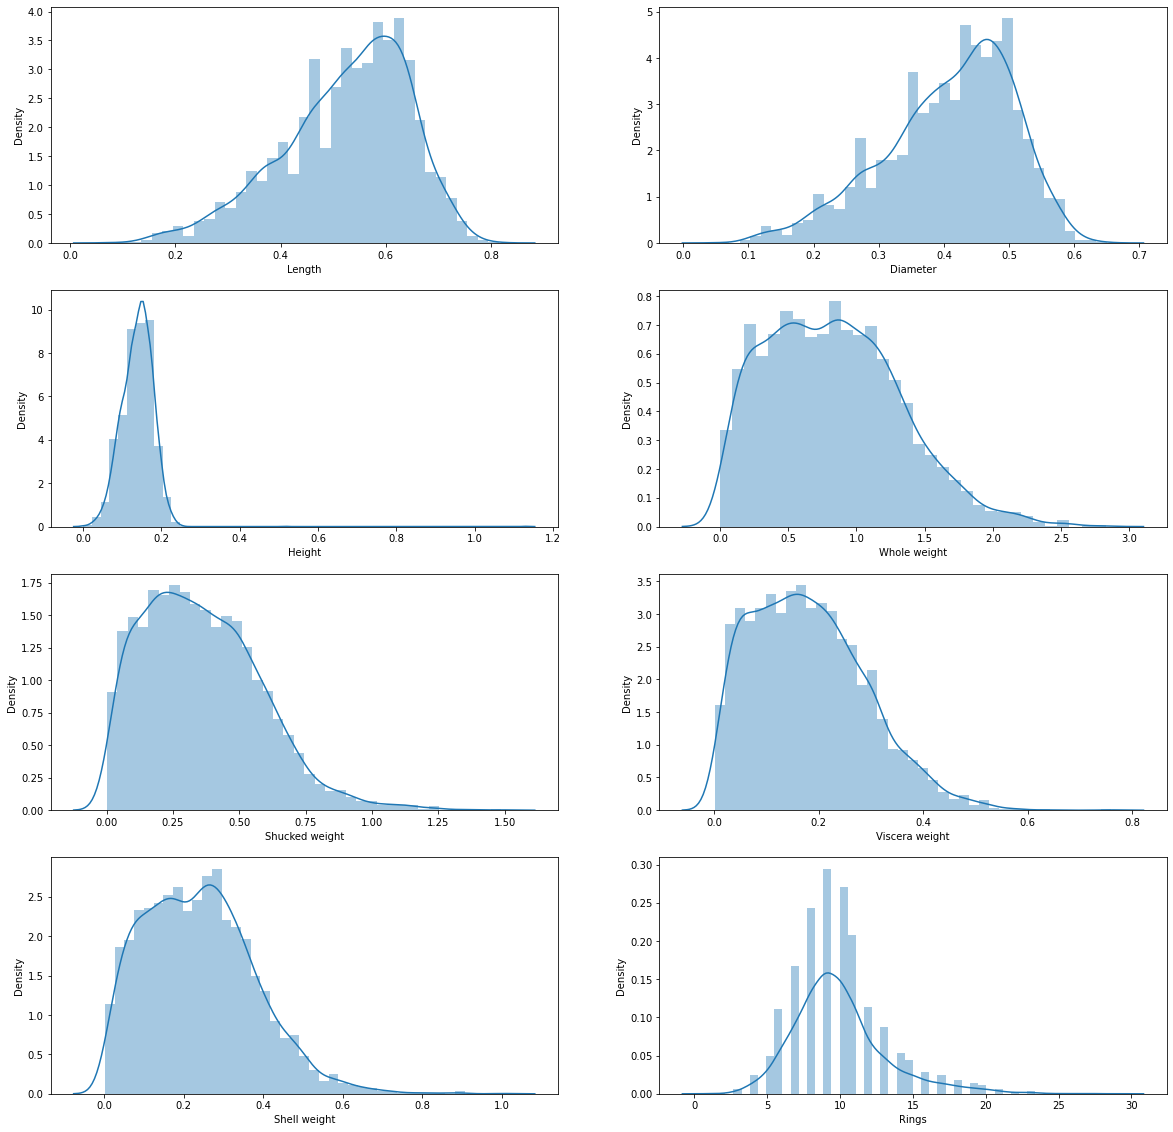

In [603]:
columns = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
fig,ax = plt.subplots(4,2,figsize=(20,20))
row = col = 0
for n,i in enumerate(columns):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    sn.distplot(df[i],kde=True,ax=ax[row,col])
    col += 1

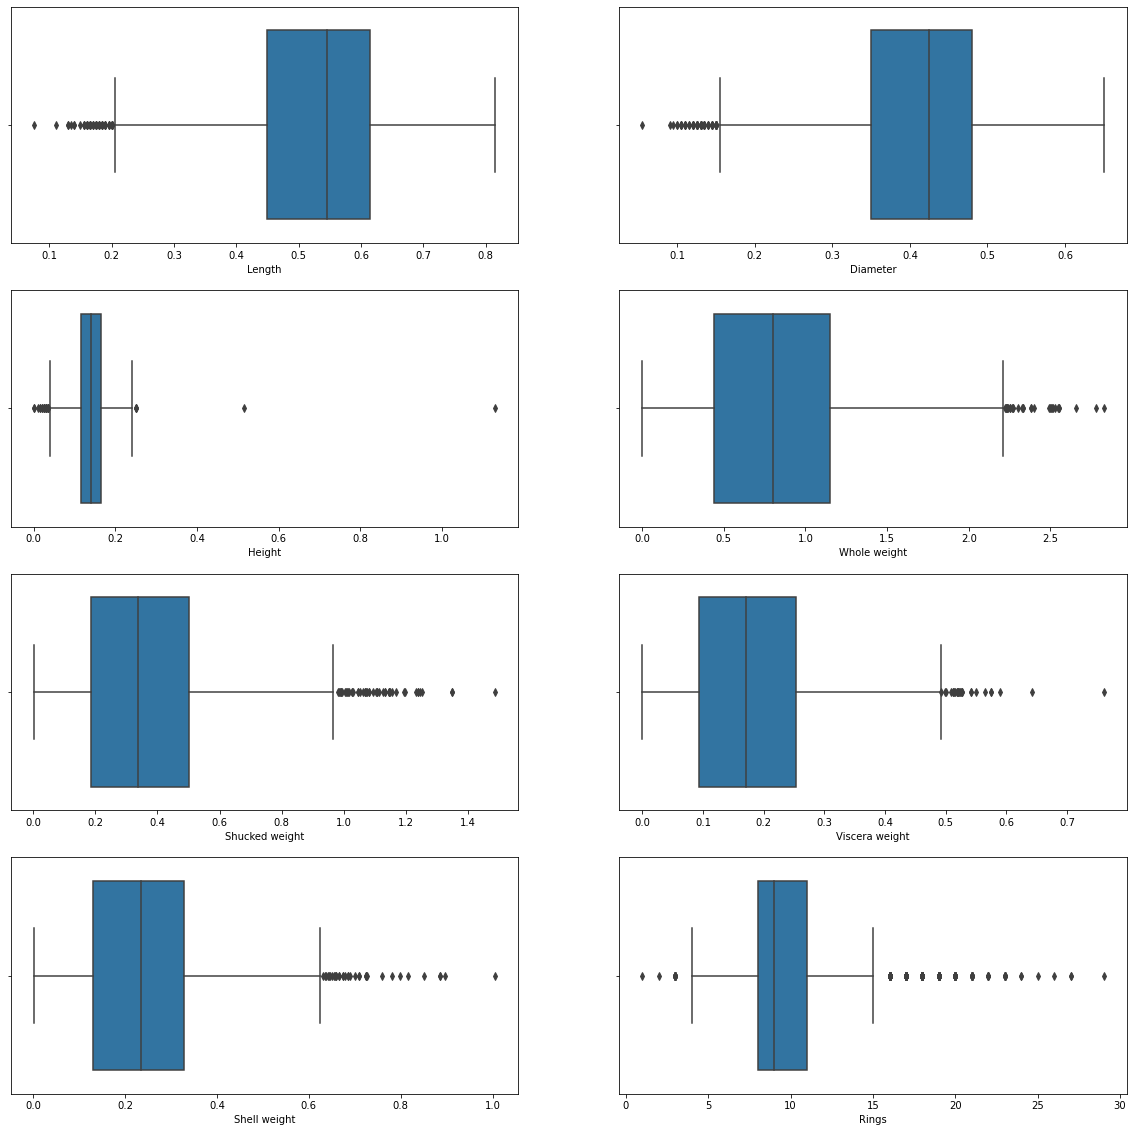

In [604]:
fig,ax = plt.subplots(4,2,figsize=(20,20))
row = col = 0
for n,i in enumerate(columns):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    sn.boxplot(df[i],ax=ax[row,col])
    col += 1

<AxesSubplot:title={'center':'Comparision between Length and Number of rings'}, xlabel='Rings', ylabel='Length'>

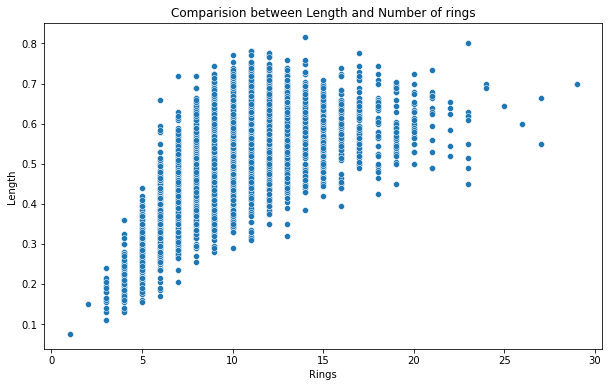

In [605]:
#Bivariate analysis
plt.figure(figsize=[10,6])
plt.title("Comparision between Length and Number of rings")
sn.scatterplot(df['Rings'],df['Length'])

<AxesSubplot:title={'center':'Comparision between Diameter and Number of rings'}, xlabel='Diameter', ylabel='Rings'>

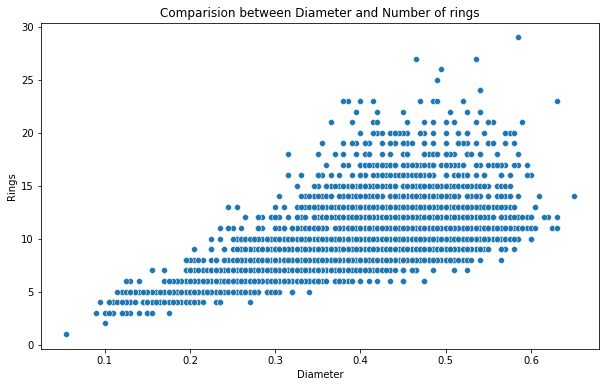

In [606]:
plt.figure(figsize=[10,6])
plt.title("Comparision between Diameter and Number of rings")
sn.scatterplot(df['Diameter'],df['Rings'])

<AxesSubplot:title={'center':'Comparision between Height and Number of rings'}, xlabel='Height', ylabel='Rings'>

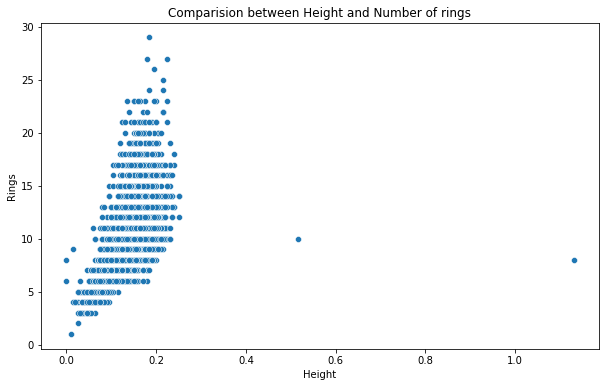

In [607]:
plt.figure(figsize=[10,6])
plt.title("Comparision between Height and Number of rings")
sn.scatterplot(df['Height'],df['Rings'])

<AxesSubplot:title={'center':'Comparision between Shell weight and Number of rings'}, xlabel='Shell weight', ylabel='Rings'>

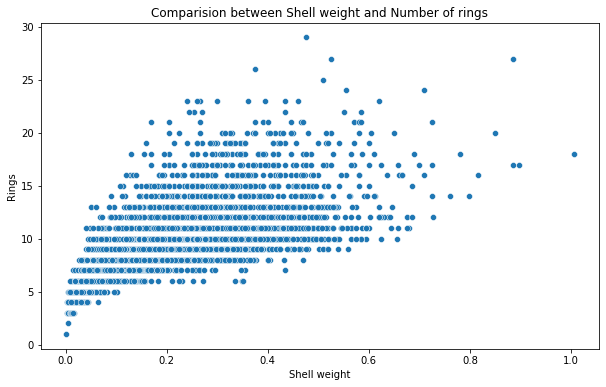

In [608]:
plt.figure(figsize=[10,6])
plt.title("Comparision between Shell weight and Number of rings")
sn.scatterplot(df['Shell weight'],df['Rings'])

<AxesSubplot:title={'center':'Comparision between Viscera and Number of rings'}, xlabel='Viscera weight', ylabel='Rings'>

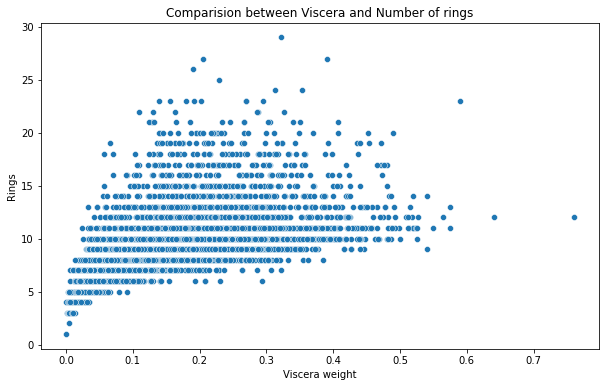

In [609]:
plt.figure(figsize=[10,6])
plt.title("Comparision between Viscera and Number of rings")
sn.scatterplot(df['Viscera weight'],df['Rings'])

In [610]:
cor=df.corr()
cor

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

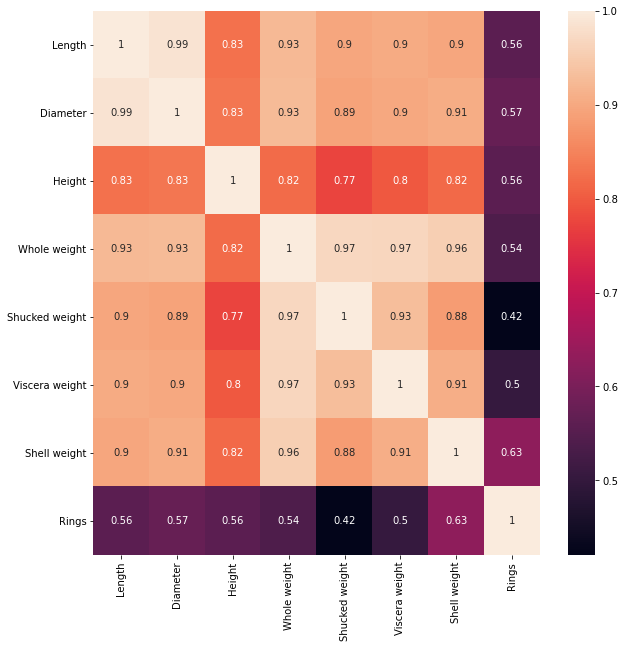

In [611]:
plt.figure(figsize=(10,10))
sn.heatmap(df.corr(),annot=True)

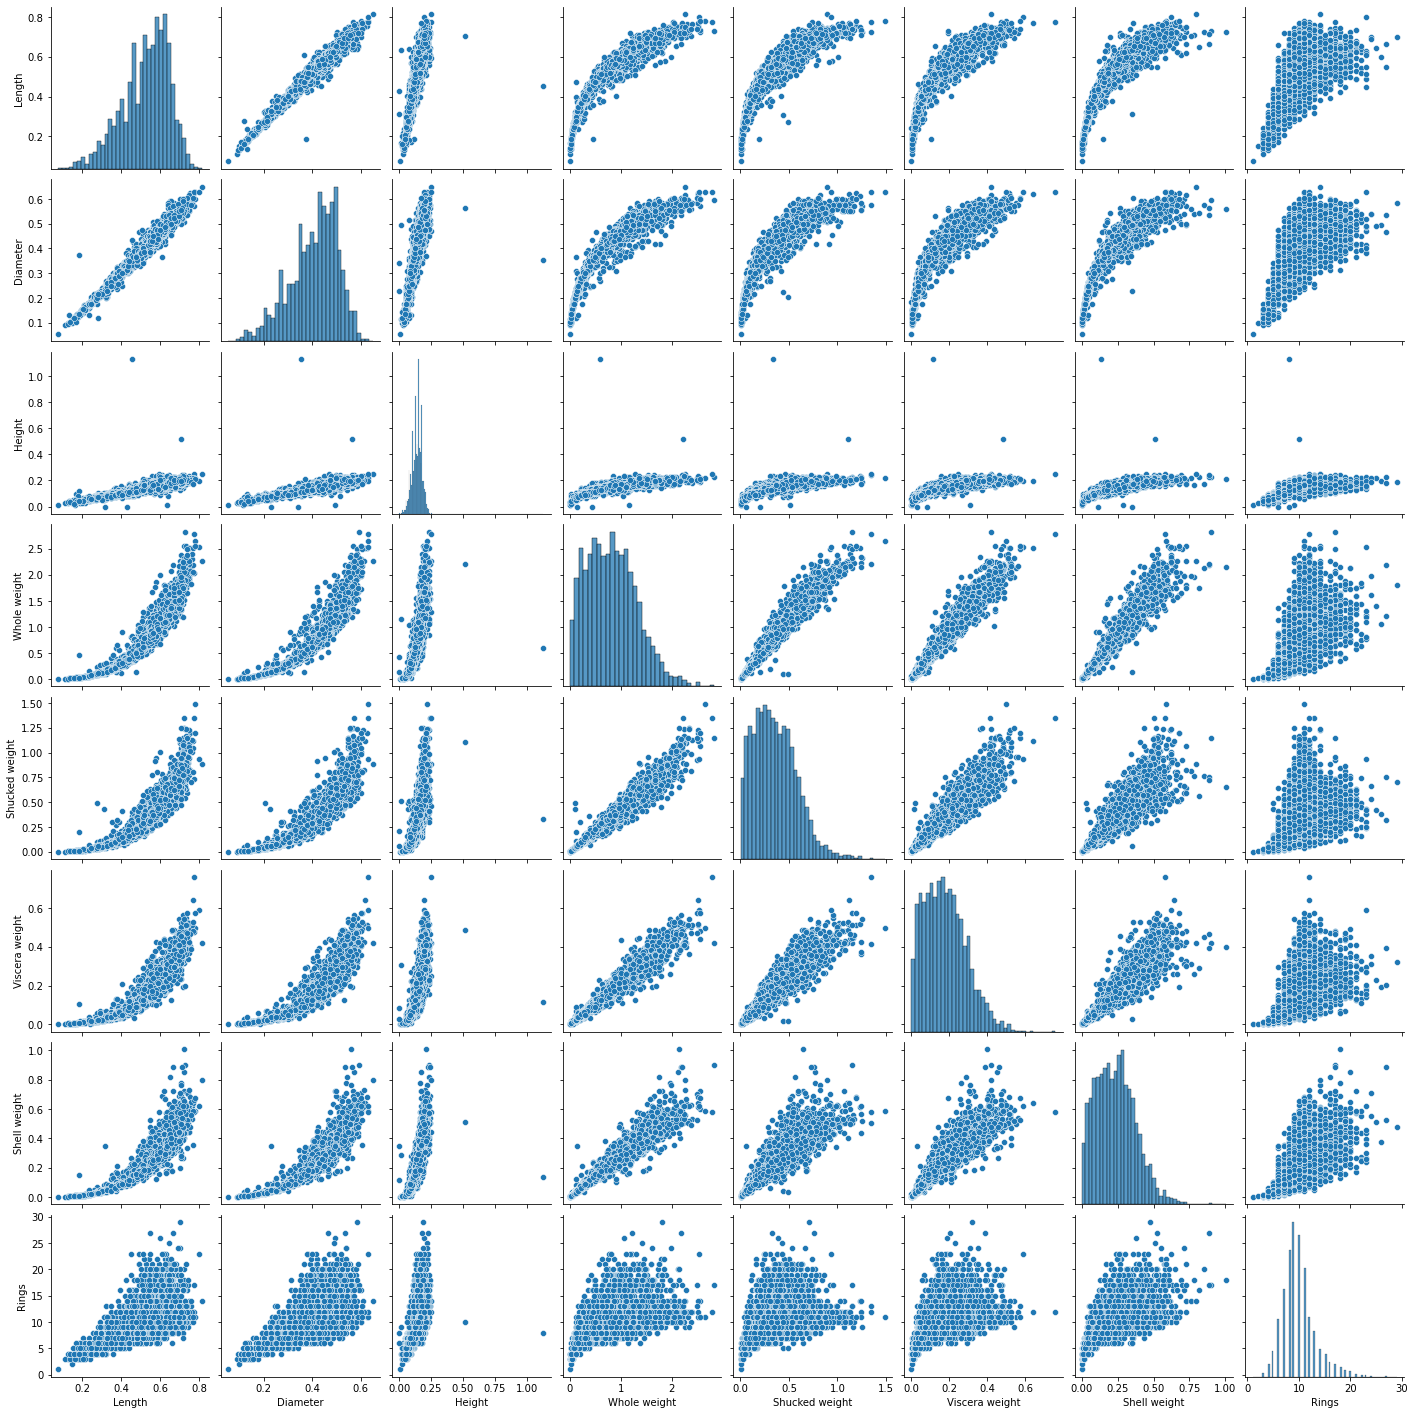

In [612]:
sn.pairplot(df)

We shall now remove the outliers, let us see in IQR and zscore which gives us less data loss.

In [613]:
df = pd.get_dummies(df)
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [614]:
df.shape

(4177, 11)

In [615]:
Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1

df_iqr = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [616]:
df_iqr.shape

(4024, 11)

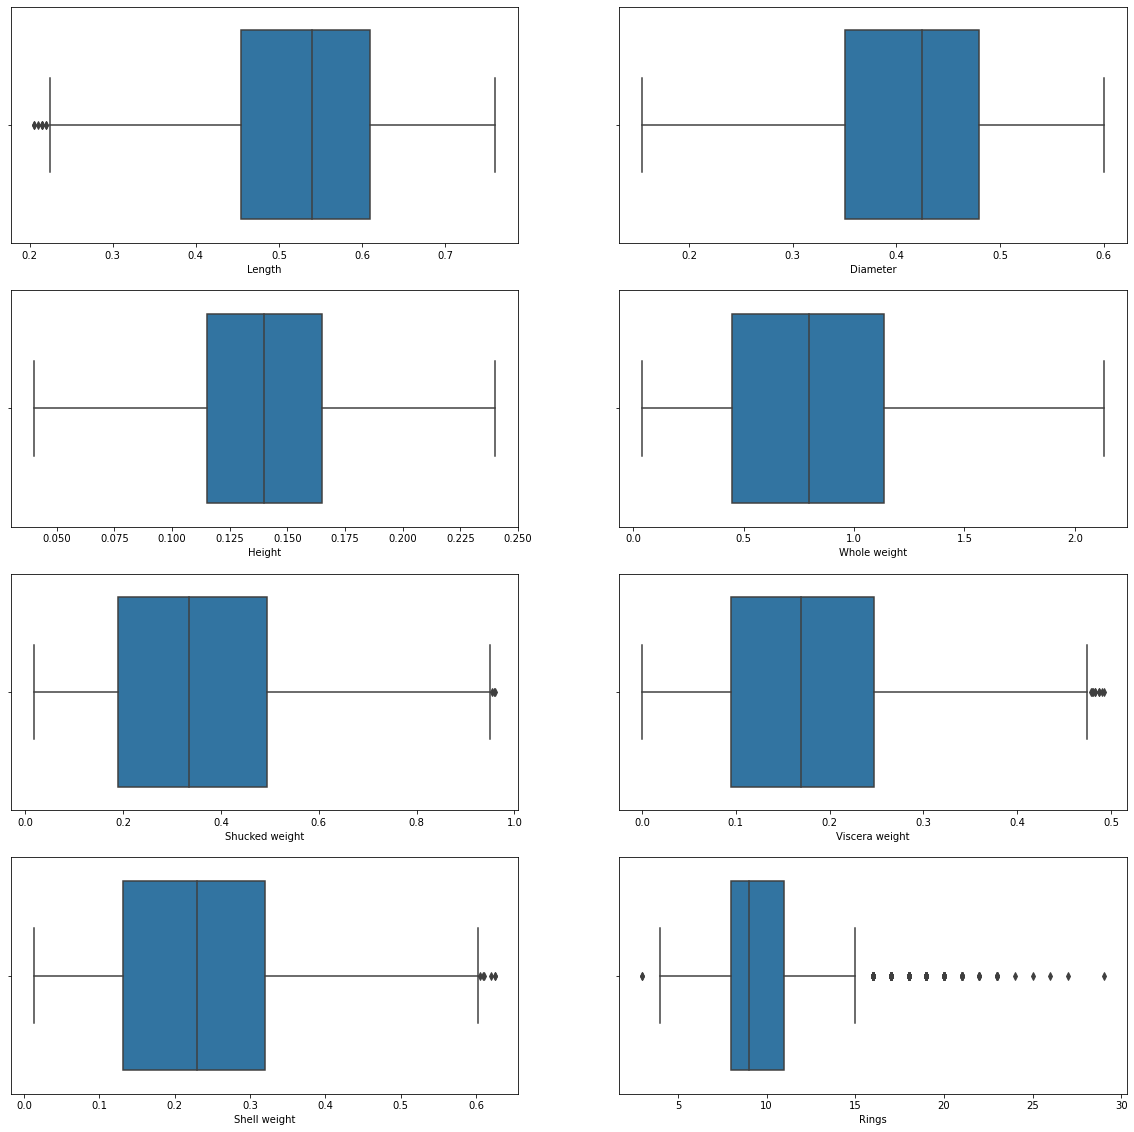

In [617]:
fig,ax = plt.subplots(4,2,figsize=(20,20))
row = col = 0
for n,i in enumerate(columns):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    sn.boxplot(df_iqr[i],ax=ax[row,col])
    col += 1

In [618]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_zscore=df[(z<3).all(axis=1)]
df_zscore.shape

(4027, 11)

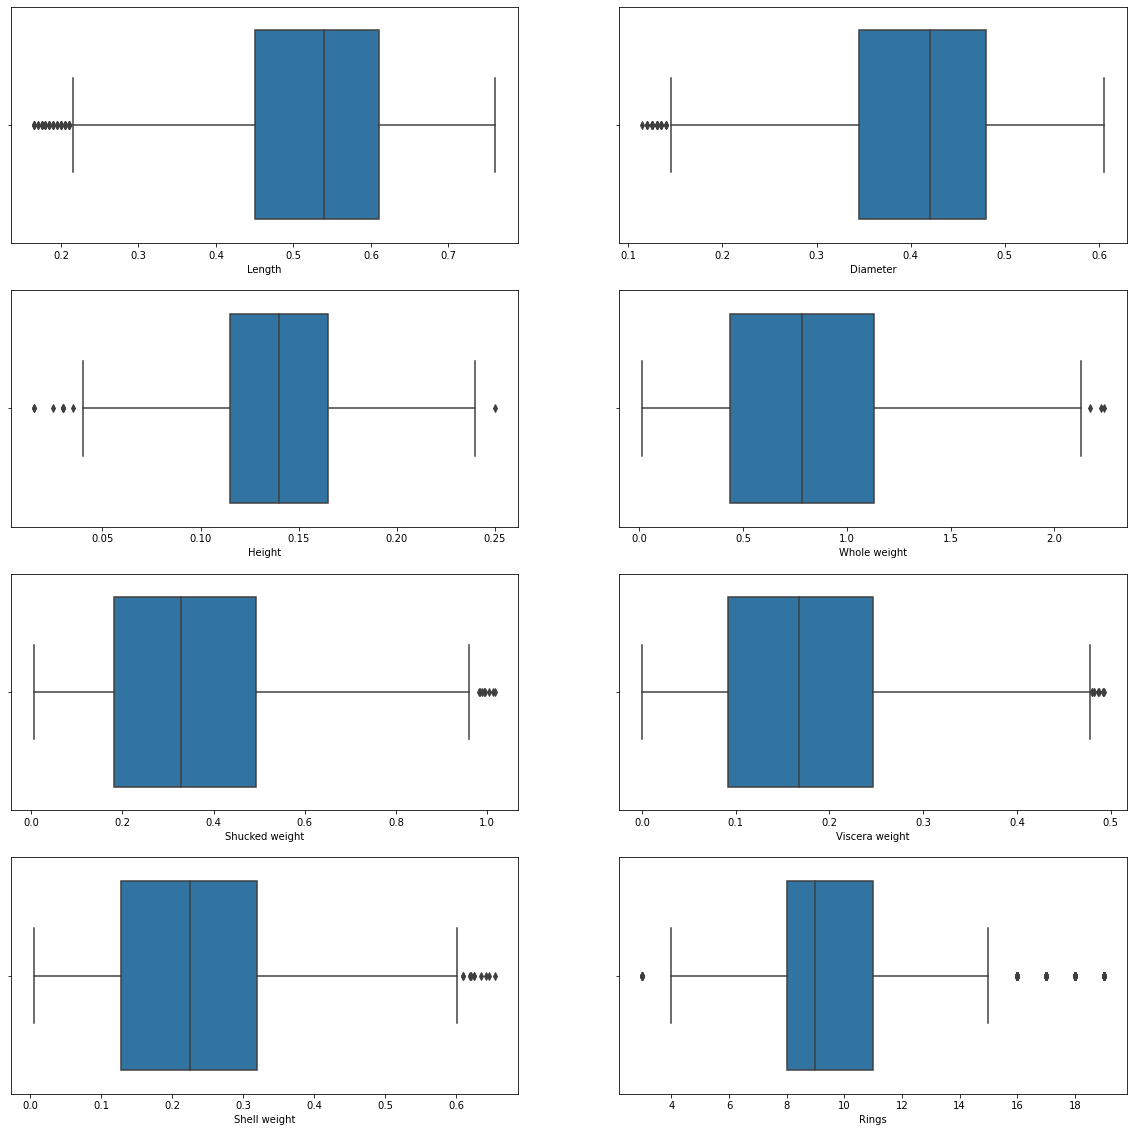

In [619]:
fig,ax = plt.subplots(4,2,figsize=(20,20))
row = col = 0
for n,i in enumerate(columns):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    sn.boxplot(df_zscore[i],ax=ax[row,col])
    col += 1

Since there is relatively less data loss using zscore method. I will consider the zscore method to remove outliers

In [672]:
df_zscore.skew()

Length           -0.082985
Diameter         -0.080956
Height           -0.015962
Whole weight     -0.016797
Shucked weight    0.021815
Viscera weight    0.035902
Shell weight      0.016660
Sex_F             0.821149
Sex_I             0.731618
Sex_M             0.576507
dtype: float64

In [673]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
Sex_F             0.807302
Sex_I             0.765708
Sex_M             0.557390
dtype: float64

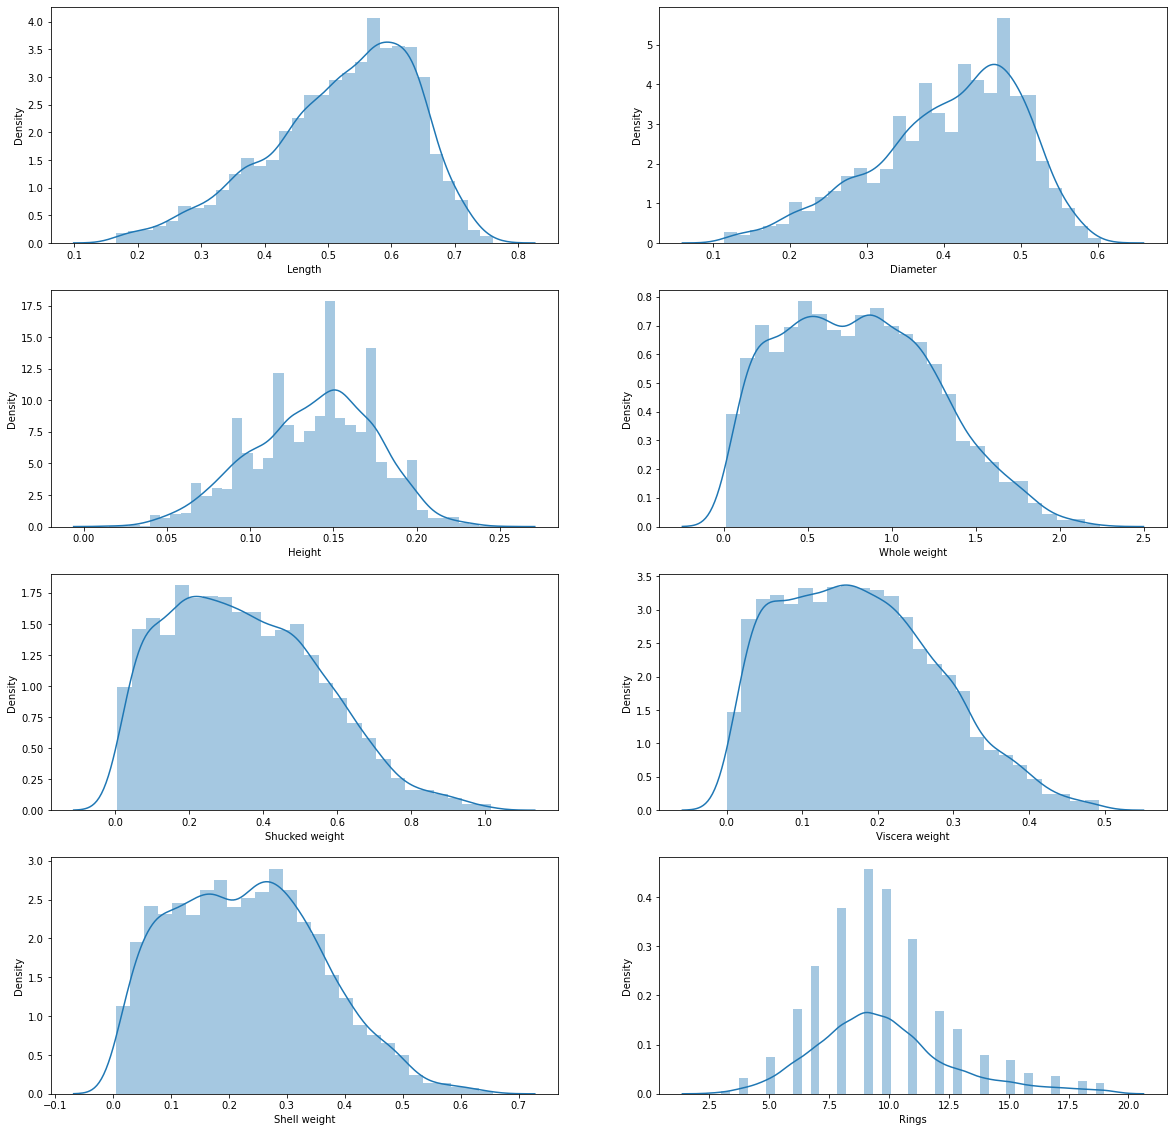

In [622]:
fig,ax = plt.subplots(4,2,figsize=(20,20))
row = col = 0
for n,i in enumerate(columns):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    sn.distplot(df_zscore[i],kde=True,ax=ax[row,col])
    col += 1

Removing skewness

In [623]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
dfpt=pt.fit_transform(df_zscore)
df_zscore=pd.DataFrame(dfpt,columns=df_zscore.columns)


In [624]:
df_zscore.skew()

Length           -0.082985
Diameter         -0.080956
Height           -0.015962
Whole weight     -0.016797
Shucked weight    0.021815
Viscera weight    0.035902
Shell weight      0.016660
Rings             0.004745
Sex_F             0.821149
Sex_I             0.731618
Sex_M             0.576507
dtype: float64

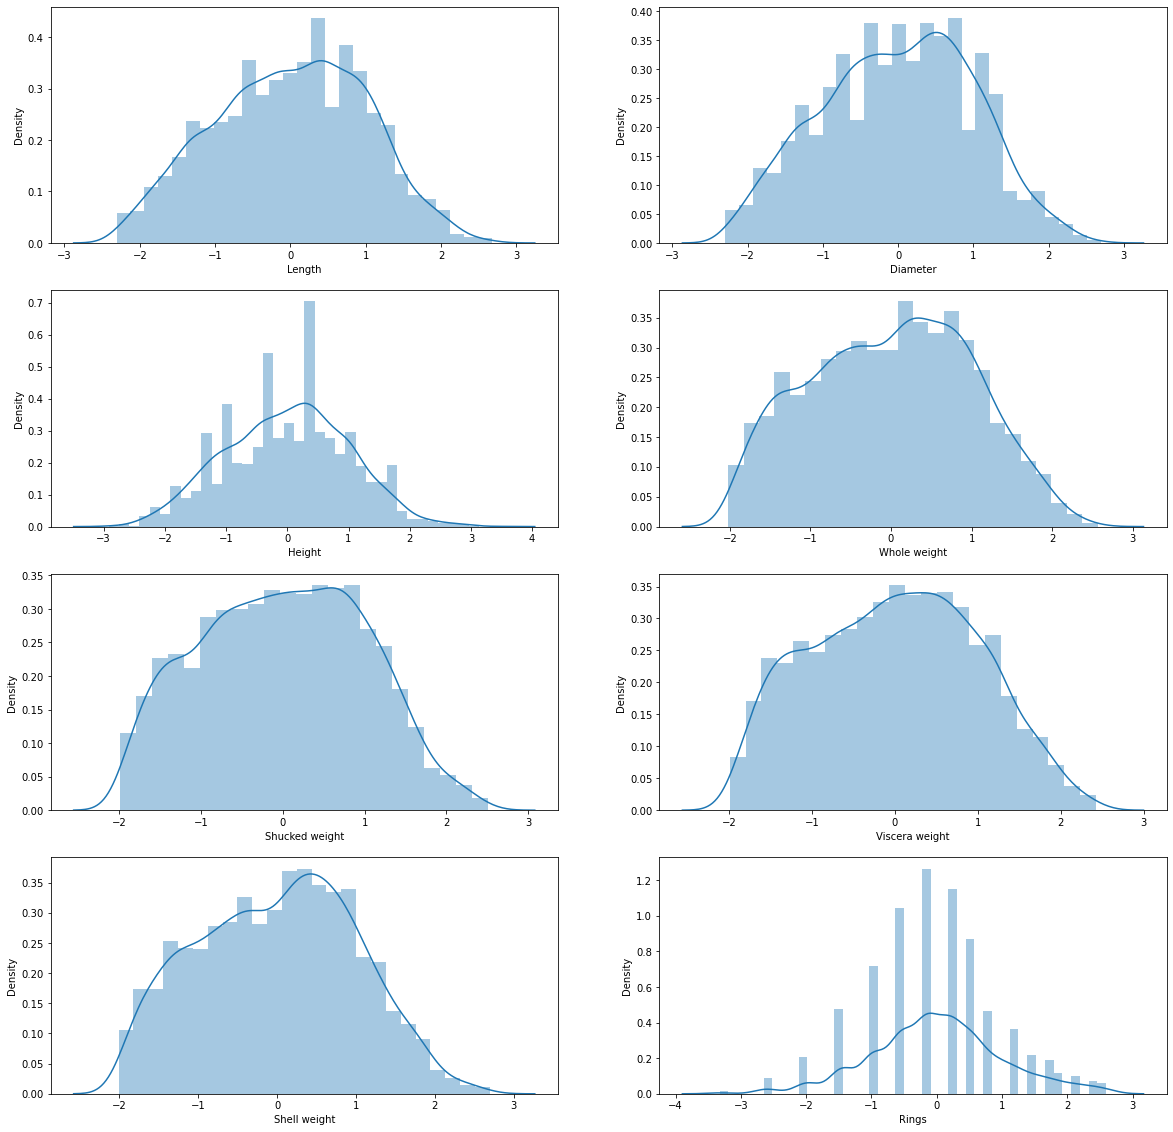

In [625]:
fig,ax = plt.subplots(4,2,figsize=(20,20))
row = col = 0
for n,i in enumerate(columns):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    sn.distplot(df_zscore[i],kde=True,ax=ax[row,col])
    col += 1

We can now see that the features are mostly normally distributed.

Let us now split the features and the target variable

In [626]:
y = df_zscore['Rings']
x = df_zscore
x.drop('Rings',axis = 1, inplace = True)

In [627]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.68445079, -0.54337947, -1.15893308, ..., -0.67052519,
        -0.6990884 ,  1.32883283],
       [-1.4117394 , -1.40113174, -1.28040611, ..., -0.67052519,
        -0.6990884 ,  1.32883283],
       [-0.0462191 ,  0.03716259, -0.12830502, ...,  1.49136828,
        -0.6990884 , -0.7525401 ],
       ...,
       [ 0.65112915,  0.70592133,  1.94363286, ..., -0.67052519,
        -0.6990884 ,  1.32883283],
       [ 0.92606411,  0.8377131 ,  0.28606972, ...,  1.49136828,
        -0.6990884 , -0.7525401 ],
       [ 1.9719402 ,  1.85550496,  1.62558351, ..., -0.67052519,
        -0.6990884 ,  1.32883283]])

In [657]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]= [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,34.958679,Length
1,33.590478,Diameter
2,6.529690,Height
3,136.691871,Whole weight
4,36.349121,Shucked weight
5,22.138565,Viscera weight
6,30.134628,Shell weight
7,inf,Sex_F
8,inf,Sex_I
9,inf,Sex_M


As the vif is high, let us implement PCA to reduce the number of components. Before that let us split the data and plot a scree plot.

In [658]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=42)

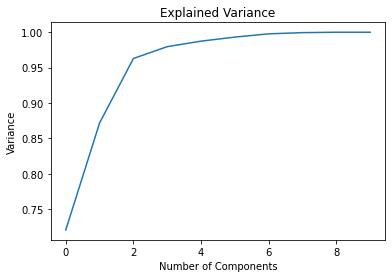

In [659]:
from sklearn.decomposition import PCA
pca = PCA()
principle_components = pca.fit_transform(x_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.title('Explained Variance')
plt.show()

We can see that 4 components are enough to explain more than 95% of the data

In [643]:
pca = PCA(n_components=4)
new_data = pca.fit_transform(x_scaled)
pca_df = pd.DataFrame(new_data,columns = ['PC-1','PC-2','PC=3','PC=4'])
pca_df

,PC-1,PC-2,PC=3,PC=4
0,-1.490886,1.545441,-1.141537,0.526920
1,-3.173707,1.571383,-1.691527,0.021501
2,-0.060490,-1.459208,-1.137442,-0.007614
3,-1.216280,1.535311,-1.078604,-0.165885
4,-4.218228,-0.215933,0.470647,0.113819
...,...,...,...,...
4022,1.307232,-1.482857,-0.724924,-0.292191
4023,1.111877,1.500379,-0.313236,0.523225
4024,2.656129,1.462959,0.129745,-0.985625
4025,2.153285,-1.488979,-0.419183,0.551549


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=42)

In [675]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
lm = LinearRegression()
lm.fit(X_train,y_train)
pred= lm.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.5421770853406909
Mean absolute error =  0.4997765329265293
Mean Squared error =  0.4370203362874016
Root Mean Sqaured Error=  0.6610751366428793


In [664]:
from sklearn.model_selection import cross_val_score


In [665]:
cv_score = cross_val_score(lm,x_scaled,y,cv=3)
cv_mean = cv_score.mean()
cv_mean

0.5425525674976991

In [666]:
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred= dtr.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.20923207307504865
Mean absolute error =  0.6552506593601146
Mean Squared error =  0.770275735082648
Root Mean Sqaured Error=  0.8776535393209829


In [667]:
cv_score = cross_val_score(dtr,x_scaled,y,cv=3)
cv_mean = cv_score.mean()
cv_mean

0.20756930060814902

In [668]:
from sklearn.ensemble import RandomForestRegressor
  
rfr = RandomForestRegressor(n_estimators = 100, random_state = 12)
rfr.fit(X_train, y_train) 
pred= rfr.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.6005409273386544
Mean absolute error =  0.47827533153425084
Mean Squared error =  0.38910737316594896
Root Mean Sqaured Error=  0.623784717002548


In [669]:
cv_score = cross_val_score(rfr,x_scaled,y,cv=3)
cv_mean = cv_score.mean()
cv_mean

0.580612372681128

In [670]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha= 0.001,random_state= 0)
lasso.fit(X_train, y_train) 
pred= lasso.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.5419510341503555
Mean absolute error =  0.5052458978208255
Mean Squared error =  0.44617895068873564
Root Mean Sqaured Error=  0.6679662796045438


In [671]:
cv_score = cross_val_score(lasso,x_scaled,y,cv=3)
cv_mean = cv_score.mean()
cv_mean

0.542410047001073

In [676]:
 from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(X_train, y_train) 
pred= knr.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.48741103305850086
Mean absolute error =  0.5297665977653174
Mean Squared error =  0.48929792620075624
Root Mean Sqaured Error=  0.6994983389549658


In [677]:
cv_score = cross_val_score(lasso,x_scaled,y,cv=3)
cv_mean = cv_score.mean()
cv_mean

0.542410047001073

In [678]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha= 0.001,random_state= 0)
ridge.fit(X_train, y_train) 
pred= ridge.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.5423749548082516
Mean absolute error =  0.499954314557332
Mean Squared error =  0.43683145762168707
Root Mean Sqaured Error=  0.660932264019307


In [679]:
cv_score = cross_val_score(lasso,x_scaled,y,cv=3)
cv_mean = cv_score.mean()
cv_mean

0.542410047001073

Considering the r2score, mse,rmse,mae and cv mean score, we see that the Random Forest Regressor is the best model.

<b>Hyperparameter tuning<b>

In [681]:
from sklearn.model_selection import GridSearchCV

In [692]:
parameter = { 
           'criterion':['mse', 'mae'],
          'max_features':['auto', 'sqrt'],
       'n_estimators': [100, 200, 300]
}

In [693]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,cv=3)

In [694]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300]})

In [695]:
GCV.best_params_

{'criterion': 'mse', 'max_features': 'sqrt', 'n_estimators': 200}

In [699]:
Final_mod = RandomForestRegressor(criterion= 'mse',max_features='sqrt',n_estimators=200)
Final_mod.fit(X_train,y_train)
pred = Final_mod.predict(X_test)
r2=r2_score(y_test,pred)
cv_score = cross_val_score(Final_mod,x_scaled,y,cv=3)
cv_mean = cv_score.mean()
print(r2,cv_mean)

0.6100655872589502 0.5936125166671341


<b>Serialization<b>

Saving the model

In [700]:
import joblib
joblib.dump(Final_mod,"Abalone.pkl")

['Abalone.pkl']